In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib.colors import ListedColormap 
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import statsmodels.api as sm
import patsy
import scipy.stats as stats
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [3]:
pd.set_option('display.min_rows', None)

In [4]:
#read in the CSV as a dataframe 
df = pd.read_csv('modified_fifa_data.csv', index_col = 0)
# drop NAs and set Value_Euro as a interger 
df.dropna
df['Value_Euro'].fillna(0).astype(int)
df

,Player_Name,Age,Height_Cm,Weight_Kgs,Positions,Nationality,Overall_Rating,Potential,Value_Euro,International_Reputation_1_5,...,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,Standing_Tackle,Sliding_Tackle,Original_Position
Player_Id,,,,,,,,,,,,,,,,,,,,,
158023,L. Messi,31,170.18,72.1,FW,Argentina,94,94,110500000.0,5,...,48,22,94,94,75,96,33,28,26,"CF,RW,ST"
190460,C. Eriksen,27,154.94,76.2,MF,Denmark,88,89,69500000.0,3,...,46,56,84,91,67,88,59,57,22,"CAM,RM,CM"
195864,P. Pogba,25,190.50,83.9,MF,France,88,91,73000000.0,4,...,78,64,82,88,82,87,63,67,67,"CM,CAM"
198219,L. Insigne,27,162.56,59.0,MF,Italy,88,88,62000000.0,3,...,34,26,83,87,61,83,51,24,22,"LW,ST"
201024,K. Koulibaly,27,187.96,88.9,DF,Senegal,88,91,60000000.0,3,...,87,88,24,49,33,80,91,88,87,CB
203376,V. van Dijk,27,193.04,92.1,DF,Netherlands,88,90,59500000.0,3,...,82,88,41,60,62,87,90,89,84,CB
231747,K. Mbappé,20,152.40,73.0,DF,France,88,95,81000000.0,3,...,62,38,88,82,70,86,34,34,32,"RW,ST,RM"
153079,S. Agüero,30,172.72,69.9,FW,Argentina,89,89,64500000.0,4,...,65,24,92,83,83,90,30,20,12,ST
167495,M. Neuer,32,193.04,92.1,GK,Germany,89,89,38000000.0,5,...,29,30,12,70,47,70,17,10,11,GK


In [5]:
df.dtypes.to_string

<bound method Series.to_string of Player_Name                      object
Age                               int64
Height_Cm                       float64
Weight_Kgs                      float64
Positions                        object
Nationality                      object
Overall_Rating                    int64
Potential                         int64
Value_Euro                      float64
International_Reputation_1_5      int64
Skill_Moves_1_5                   int64
Work_Rate                        object
Club_Team                        object
Crossing                          int64
Finishing                         int64
Heading_Accuracy                  int64
Short_Passing                     int64
Volleys                           int64
Dribbling                         int64
Curve                             int64
Freekick_Accuracy                 int64
Long_Passing                      int64
Ball_Control                      int64
Acceleration                      int64
Sprint

In [6]:
df.dtypes

Player_Name                      object
Age                               int64
Height_Cm                       float64
Weight_Kgs                      float64
Positions                        object
Nationality                      object
Overall_Rating                    int64
Potential                         int64
Value_Euro                      float64
International_Reputation_1_5      int64
Skill_Moves_1_5                   int64
Work_Rate                        object
Club_Team                        object
Crossing                          int64
Finishing                         int64
Heading_Accuracy                  int64
Short_Passing                     int64
Volleys                           int64
Dribbling                         int64
Curve                             int64
Freekick_Accuracy                 int64
Long_Passing                      int64
Ball_Control                      int64
Acceleration                      int64
Sprint_Speed                      int64


In [7]:
age_df = df['Age']

In [8]:
name_df = df['Player_Name']

In [9]:
df = df[df['Value_Euro']!=1000]
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 17954 entries, 158023 to 247187
Data columns (total 43 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Player_Name                   17954 non-null  object 
 1   Age                           17954 non-null  int64  
 2   Height_Cm                     17954 non-null  float64
 3   Weight_Kgs                    17954 non-null  float64
 4   Positions                     17954 non-null  object 
 5   Nationality                   17954 non-null  object 
 6   Overall_Rating                17954 non-null  int64  
 7   Potential                     17954 non-null  int64  
 8   Value_Euro                    17699 non-null  float64
 9   International_Reputation_1_5  17954 non-null  int64  
 10  Skill_Moves_1_5               17954 non-null  int64  
 11  Work_Rate                     17954 non-null  object 
 12  Club_Team                     17940 non-null  object 


In [10]:
#create dataframes for use later
new_df = df.copy()
new_df.drop(['Overall_Rating','Potential','Work_Rate'],axis=1,inplace=True)
new_df.head()

,Player_Name,Age,Height_Cm,Weight_Kgs,Positions,Nationality,Value_Euro,International_Reputation_1_5,Skill_Moves_1_5,Club_Team,...,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,Standing_Tackle,Sliding_Tackle,Original_Position
Player_Id,,,,,,,,,,,,,,,,,,,,,
158023,L. Messi,31,170.18,72.1,FW,Argentina,110500000.0,5,4,FC Barcelona,...,48,22,94,94,75,96,33,28,26,"CF,RW,ST"
190460,C. Eriksen,27,154.94,76.2,MF,Denmark,69500000.0,3,4,Tottenham Hotspur,...,46,56,84,91,67,88,59,57,22,"CAM,RM,CM"
195864,P. Pogba,25,190.50,83.9,MF,France,73000000.0,4,5,Manchester United,...,78,64,82,88,82,87,63,67,67,"CM,CAM"
198219,L. Insigne,27,162.56,59.0,MF,Italy,62000000.0,3,4,Napoli,...,34,26,83,87,61,83,51,24,22,"LW,ST"
201024,K. Koulibaly,27,187.96,88.9,DF,Senegal,60000000.0,3,2,Napoli,...,87,88,24,49,33,80,91,88,87,CB


In [11]:
new_df.sort_values(['Value_Euro'], ascending=False)

,Player_Name,Age,Height_Cm,Weight_Kgs,Positions,Nationality,Value_Euro,International_Reputation_1_5,Skill_Moves_1_5,Club_Team,...,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,Standing_Tackle,Sliding_Tackle,Original_Position
Player_Id,,,,,,,,,,,,,,,,,,,,,
158023,L. Messi,31,170.18,72.1,FW,Argentina,110500000.0,5,4,FC Barcelona,...,48,22,94,94,75,96,33,28,26,"CF,RW,ST"
190871,Neymar Jr,27,175.26,68.0,MF,Brazil,108000000.0,5,5,Paris Saint-Germain,...,56,36,89,88,81,94,27,24,33,"LW,CAM"
192985,K. De Bruyne,27,154.94,69.9,MF,Belgium,102000000.0,4,4,Manchester City,...,76,61,87,94,79,90,68,58,51,"CAM,CM"
202126,H. Kane,25,187.96,88.9,FW,England,96500000.0,3,3,Tottenham Hotspur,...,78,35,93,81,90,91,56,36,38,ST
183277,E. Hazard,28,172.72,76.2,MF,Belgium,93000000.0,4,4,Chelsea,...,54,41,87,89,86,91,34,27,22,"LW,CF"
211110,P. Dybala,25,152.40,74.8,MF,Argentina,89000000.0,3,4,Juventus,...,48,32,84,87,86,84,23,20,20,"CAM,RW"
231747,K. Mbappé,20,152.40,73.0,DF,France,81000000.0,3,5,Paris Saint-Germain,...,62,38,88,82,70,86,34,34,32,"RW,ST,RM"
176580,L. Suárez,32,182.88,86.2,FW,Uruguay,80000000.0,5,3,FC Barcelona,...,87,41,92,84,85,85,62,45,38,ST
209331,M. Salah,26,175.26,71.2,DF,Egypt,78500000.0,3,4,Liverpool,...,63,55,92,84,75,91,38,43,41,"RW,ST"


In [12]:
#drop coloums that are not rationals
prep_df = df.copy()
prep_df.drop(['Age','Height_Cm','Weight_Kgs','Positions','Nationality','International_Reputation_1_5','Skill_Moves_1_5','Club_Team'],axis=1,inplace=True)
prep_df

,Player_Name,Overall_Rating,Potential,Value_Euro,Work_Rate,Crossing,Finishing,Heading_Accuracy,Short_Passing,Volleys,...,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,Standing_Tackle,Sliding_Tackle,Original_Position
Player_Id,,,,,,,,,,,,,,,,,,,,,
158023,L. Messi,94,94,110500000.0,Medium/ Low,86,95,70,92,86,...,48,22,94,94,75,96,33,28,26,"CF,RW,ST"
190460,C. Eriksen,88,89,69500000.0,High/ Medium,88,81,52,91,80,...,46,56,84,91,67,88,59,57,22,"CAM,RM,CM"
195864,P. Pogba,88,91,73000000.0,High/ Medium,80,75,75,86,85,...,78,64,82,88,82,87,63,67,67,"CM,CAM"
198219,L. Insigne,88,88,62000000.0,High/ Medium,86,77,56,85,74,...,34,26,83,87,61,83,51,24,22,"LW,ST"
201024,K. Koulibaly,88,91,60000000.0,High/ High,30,22,83,68,14,...,87,88,24,49,33,80,91,88,87,CB
203376,V. van Dijk,88,90,59500000.0,Medium/ Medium,53,52,83,79,45,...,82,88,41,60,62,87,90,89,84,CB
231747,K. Mbappé,88,95,81000000.0,High/ Medium,77,88,77,82,78,...,62,38,88,82,70,86,34,34,32,"RW,ST,RM"
153079,S. Agüero,89,89,64500000.0,High/ Medium,70,93,77,81,85,...,65,24,92,83,83,90,30,20,12,ST
167495,M. Neuer,89,89,38000000.0,Medium/ Medium,15,13,25,55,11,...,29,30,12,70,47,70,17,10,11,GK


In [13]:
#removing outlyers 
prep_df[['Value_Euro']].describe()

,Value_Euro
count,1.769900e+04
mean,2.479280e+06
std,5.687014e+06
min,1.000000e+04
25%,3.250000e+05
50%,7.000000e+05
75%,2.100000e+06
max,1.105000e+08


In [14]:
Q1 = prep_df['Value_Euro'].quantile(0.25)
Q1

325000.0

In [15]:
Q3 = prep_df['Value_Euro'].quantile(0.75)
Q3

2100000.0

In [16]:
IQR = Q3 - Q1

In [17]:
IQR

1775000.0

In [18]:
upper_lim = Q1 - 1.5 * IQR
lower_lim = Q3  + 1.5 * IQR

In [19]:
upper_lim

-2337500.0

In [20]:
lower_lim

4762500.0

In [21]:
#double checking for nulls
prep_df.isnull().sum()

Player_Name            0
Overall_Rating         0
Potential              0
Value_Euro           255
Work_Rate              0
Crossing               0
Finishing              0
Heading_Accuracy       0
Short_Passing          0
Volleys                0
Dribbling              0
Curve                  0
Freekick_Accuracy      0
Long_Passing           0
Ball_Control           0
Acceleration           0
Sprint_Speed           0
Agility                0
Reactions              0
Balance                0
Shot_Power             0
Jumping                0
Stamina                0
Strength               0
Long_Shots             0
Aggression             0
Interceptions          0
Positioning            0
Vision                 0
Penalties              0
Composure              0
Marking                0
Standing_Tackle        0
Sliding_Tackle         0
Original_Position      0
dtype: int64

In [22]:
prep_df = prep_df.dropna()
prep_df.isnull().sum()

Player_Name          0
Overall_Rating       0
Potential            0
Value_Euro           0
Work_Rate            0
Crossing             0
Finishing            0
Heading_Accuracy     0
Short_Passing        0
Volleys              0
Dribbling            0
Curve                0
Freekick_Accuracy    0
Long_Passing         0
Ball_Control         0
Acceleration         0
Sprint_Speed         0
Agility              0
Reactions            0
Balance              0
Shot_Power           0
Jumping              0
Stamina              0
Strength             0
Long_Shots           0
Aggression           0
Interceptions        0
Positioning          0
Vision               0
Penalties            0
Composure            0
Marking              0
Standing_Tackle      0
Sliding_Tackle       0
Original_Position    0
dtype: int64

In [23]:
#checking the data types
prep_df.dtypes

Player_Name           object
Overall_Rating         int64
Potential              int64
Value_Euro           float64
Work_Rate             object
Crossing               int64
Finishing              int64
Heading_Accuracy       int64
Short_Passing          int64
Volleys                int64
Dribbling              int64
Curve                  int64
Freekick_Accuracy      int64
Long_Passing           int64
Ball_Control           int64
Acceleration           int64
Sprint_Speed           int64
Agility                int64
Reactions              int64
Balance                int64
Shot_Power             int64
Jumping                int64
Stamina                int64
Strength               int64
Long_Shots             int64
Aggression             int64
Interceptions          int64
Positioning            int64
Vision                 int64
Penalties              int64
Composure              int64
Marking                int64
Standing_Tackle        int64
Sliding_Tackle         int64
Original_Posit

In [24]:
# pass skills and target value through lambda funciton
df_show = prep_df.copy()
df_show['Value_Euro'] = df_show['Value_Euro'].apply(lambda x : "{:,}".format(int(x)))
df_show[['Overall_Rating', 'Potential', 'Crossing', 'Finishing',
          'Heading_Accuracy', 'Short_Passing', 'Volleys', 'Dribbling', 'Curve', 'Freekick_Accuracy', 'Long_Passing',
          'Ball_Control','Acceleration', 'Sprint_Speed', 'Agility', 'Reactions', 'Balance',' Shot_Power',
          'Jumping', 'Stamina', 'Strength', 'Long_Shots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
          'Penalties', 'Composure', 'Marking', 'Standing_Tackle', 'Sliding_Tackle']] = df_show[['Overall_Rating', 'Potential', 'Crossing',
                  'Finishing', 'Heading_Accuracy', 'Short_Passing', 'Volleys', 'Dribbling', 'Curve',
                  'Freekick_Accuracy', 'Long_Passing', 'Ball_Control', 'Acceleration', 'Sprint_Speed','Agility',
                  'Reactions', 'Balance', 'Shot_Power', 'Jumping', 'Stamina', 'Strength', 'Long_Shots', 'Aggression',
                  'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking', 'Standing_Tackle',
                  'Sliding_Tackle']].apply(lambda x: round(x,1))
df_show = df_show.rename(columns={'Value_Euro':'Value_Euro'})
df_show

,Player_Name,Overall_Rating,Potential,Value_Euro,Work_Rate,Crossing,Finishing,Heading_Accuracy,Short_Passing,Volleys,...,Interceptions,Positioning,Vision,Penalties,Composure,Marking,Standing_Tackle,Sliding_Tackle,Original_Position,Shot_Power
Player_Id,,,,,,,,,,,,,,,,,,,,,
158023,L. Messi,94,94,"110,500,000",Medium/ Low,86,95,70,92,86,...,22,94,94,75,96,33,28,26,"CF,RW,ST",85
190460,C. Eriksen,88,89,"69,500,000",High/ Medium,88,81,52,91,80,...,56,84,91,67,88,59,57,22,"CAM,RM,CM",84
195864,P. Pogba,88,91,"73,000,000",High/ Medium,80,75,75,86,85,...,64,82,88,82,87,63,67,67,"CM,CAM",90
198219,L. Insigne,88,88,"62,000,000",High/ Medium,86,77,56,85,74,...,26,83,87,61,83,51,24,22,"LW,ST",75
201024,K. Koulibaly,88,91,"60,000,000",High/ High,30,22,83,68,14,...,88,24,49,33,80,91,88,87,CB,55
203376,V. van Dijk,88,90,"59,500,000",Medium/ Medium,53,52,83,79,45,...,88,41,60,62,87,90,89,84,CB,81
231747,K. Mbappé,88,95,"81,000,000",High/ Medium,77,88,77,82,78,...,38,88,82,70,86,34,34,32,"RW,ST,RM",79
153079,S. Agüero,89,89,"64,500,000",High/ Medium,70,93,77,81,85,...,24,92,83,83,90,30,20,12,ST,88
167495,M. Neuer,89,89,"38,000,000",Medium/ Medium,15,13,25,55,11,...,30,12,70,47,70,17,10,11,GK,25


In [25]:
#passing origonal df through CORR_MATRIX to get Pearson Correlation Coefficient between each pair of its input columns
corr_matrix = df.corr()
corr_matrix

,Age,Height_Cm,Weight_Kgs,Overall_Rating,Potential,Value_Euro,International_Reputation_1_5,Skill_Moves_1_5,Crossing,Finishing,...,Long_Shots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,Standing_Tackle,Sliding_Tackle
Age,1.000000,0.059579,0.233819,0.461529,-0.259579,0.082360,0.259977,0.029681,0.133357,0.074761,...,0.164655,0.264859,0.198131,0.085510,0.193201,0.147924,0.394717,0.146725,0.118362,0.103008
Height_Cm,0.059579,1.000000,0.495320,0.038080,0.008526,0.011144,0.026850,-0.320141,-0.388805,-0.296794,...,-0.305601,-0.073996,-0.078730,-0.353380,-0.287254,-0.272134,-0.111849,-0.089783,-0.081452,-0.086093
Weight_Kgs,0.233819,0.495320,1.000000,0.150521,-0.015099,0.044519,0.085086,-0.353601,-0.394145,-0.294710,...,-0.278552,0.021926,-0.034607,-0.355281,-0.282234,-0.251453,-0.044538,-0.057559,-0.056318,-0.065965
Overall_Rating,0.461529,0.038080,0.150521,1.000000,0.647249,0.630928,0.489416,0.418718,0.398343,0.342331,...,0.429458,0.397072,0.322030,0.362116,0.506812,0.350902,0.729278,0.292538,0.254481,0.225466
Potential,-0.259579,0.008526,-0.015099,0.647249,1.000000,0.576341,0.358874,0.356241,0.244438,0.247552,...,0.265326,0.170005,0.151946,0.247677,0.348179,0.226746,0.434113,0.162999,0.143927,0.129755
Value_Euro,0.082360,0.011144,0.044519,0.630928,0.576341,1.000000,0.644610,0.317427,0.251093,0.261003,...,0.284085,0.189101,0.142375,0.262596,0.363445,0.243599,0.456538,0.138085,0.110455,0.090450
International_Reputation_1_5,0.259977,0.026850,0.085086,0.489416,0.358874,0.644610,1.000000,0.205661,0.191443,0.179789,...,0.214299,0.172931,0.126500,0.182556,0.283890,0.220608,0.388906,0.115318,0.089809,0.077267
Skill_Moves_1_5,0.029681,-0.320141,-0.353601,0.418718,0.356241,0.317427,0.205661,1.000000,0.746466,0.748492,...,0.757054,0.360342,0.221912,0.786617,0.676089,0.695889,0.598595,0.255601,0.225532,0.193438
Crossing,0.133357,-0.388805,-0.394145,0.398343,0.244438,0.251093,0.191443,0.746466,1.000000,0.664183,...,0.749216,0.486277,0.438164,0.791432,0.687864,0.655166,0.589726,0.457401,0.440578,0.422407
Finishing,0.074761,-0.296794,-0.294710,0.342331,0.247552,0.261003,0.179789,0.748492,0.664183,1.000000,...,0.880080,0.262142,-0.003939,0.890049,0.702865,0.840504,0.550520,0.042058,-0.013427,-0.051432


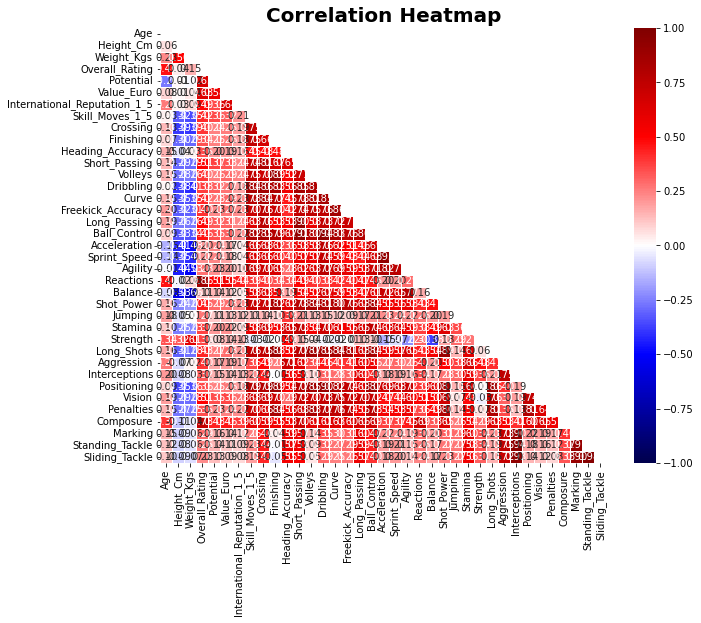

In [26]:
corr_matrix = df.corr()
fig = plt.figure(figsize=[10,8])
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix,cmap='seismic',linewidth=1,linecolor='white',vmax = 1, vmin=-1,mask=mask, annot=True,fmt='0.2f')
plt.title('Correlation Heatmap', weight='bold',fontsize=20)
plt.savefig('heatmap2.png',transparent=True, bbox_inches='tight')

In [27]:
prep_df1 = prep_df.copy()

In [28]:
prep_df1 = prep_df1[['Overall_Rating', 'Potential', 'Crossing', 'Finishing',
          'Heading_Accuracy', 'Short_Passing', 'Volleys', 'Dribbling', 'Curve', 'Freekick_Accuracy', 'Long_Passing',
          'Ball_Control','Acceleration', 'Sprint_Speed', 'Agility', 'Reactions', 'Balance','Shot_Power',
          'Jumping', 'Stamina', 'Strength', 'Long_Shots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
          'Penalties', 'Composure', 'Marking', 'Standing_Tackle', 'Sliding_Tackle']].astype(float)

In [29]:
prep_df1['Value_Euro'] = np.log(df['Value_Euro'])

In [30]:
# applying the log fucntion to Value_Euro to normalize them. More detail can be found on the READ.ME
prep_df1 = prep_df1.rename(columns={'Value_Euro':'Log_Value_Euro'})

In [31]:
# adding back player age
prep_df2 = prep_df1.join(age_df, how='inner')
prep_df2

,Overall_Rating,Potential,Crossing,Finishing,Heading_Accuracy,Short_Passing,Volleys,Dribbling,Curve,Freekick_Accuracy,...,Interceptions,Positioning,Vision,Penalties,Composure,Marking,Standing_Tackle,Sliding_Tackle,Log_Value_Euro,Age
Player_Id,,,,,,,,,,,,,,,,,,,,,
158023,94.0,94.0,86.0,95.0,70.0,92.0,86.0,97.0,93.0,94.0,...,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,18.520526,31
190460,88.0,89.0,88.0,81.0,52.0,91.0,80.0,84.0,86.0,87.0,...,56.0,84.0,91.0,67.0,88.0,59.0,57.0,22.0,18.056837,27
195864,88.0,91.0,80.0,75.0,75.0,86.0,85.0,87.0,85.0,82.0,...,64.0,82.0,88.0,82.0,87.0,63.0,67.0,67.0,18.105970,25
198219,88.0,88.0,86.0,77.0,56.0,85.0,74.0,90.0,87.0,77.0,...,26.0,83.0,87.0,61.0,83.0,51.0,24.0,22.0,17.942645,27
201024,88.0,91.0,30.0,22.0,83.0,68.0,14.0,69.0,28.0,28.0,...,88.0,24.0,49.0,33.0,80.0,91.0,88.0,87.0,17.909855,27
203376,88.0,90.0,53.0,52.0,83.0,79.0,45.0,70.0,60.0,70.0,...,88.0,41.0,60.0,62.0,87.0,90.0,89.0,84.0,17.901487,27
231747,88.0,95.0,77.0,88.0,77.0,82.0,78.0,90.0,77.0,63.0,...,38.0,88.0,82.0,70.0,86.0,34.0,34.0,32.0,18.209960,20
153079,89.0,89.0,70.0,93.0,77.0,81.0,85.0,89.0,82.0,73.0,...,24.0,92.0,83.0,83.0,90.0,30.0,20.0,12.0,17.982176,30
167495,89.0,89.0,15.0,13.0,25.0,55.0,11.0,30.0,14.0,11.0,...,30.0,12.0,70.0,47.0,70.0,17.0,10.0,11.0,17.453097,32


In [32]:
# fidning the r-squared for the data set base model
y, X = patsy.dmatrices("Q('Log_Value_Euro') ~ Age + Q('Dribbling') + Reactions + Sliding_Tackle + Composure + Short_Passing + Long_Passing + Overall_Rating + Potential + Finishing+Standing_Tackle + Heading_Accuracy  + Marking + Volleys +Strength  + Curve +Acceleration+Sprint_Speed + Agility + Balance + Freekick_Accuracy + Interceptions + Jumping + Aggression + Shot_Power+ Vision + Ball_Control+ Positioning ", data=prep_df2, return_type="dataframe")
model = sm.OLS(y, X)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Q('Log_Value_Euro')   R-squared:                       0.971
Model:                             OLS   Adj. R-squared:                  0.971
Method:                  Least Squares   F-statistic:                 2.090e+04
Date:                 Sat, 09 Apr 2022   Prob (F-statistic):               0.00
Time:                         20:55:26   Log-Likelihood:                 37.126
No. Observations:                17699   AIC:                            -16.25
Df Residuals:                    17670   BIC:                             209.4
Df Model:                           28                                         
Covariance Type:             nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             1.7675      0.038     46.284      0.000       1.693       1.842
Age                  -0.0983      0.001   -116.055      0.000      -0.100      -0.097
Q('Dribbling')       -0.0003      0.000     -0.743      0.457      -0.001       0.000
Reactions             0.0015      0.000      3.659      0.000       0.001       0.002
Sliding_Tackle       -0.0019      0.000     -4.602      0.000      -0.003      -0.001
Composure            -0.0004      0.000     -1.231      0.218      -0.001       0.000
Short_Passing         0.0007      0.000      1.664      0.096      -0.000       0.002
Long_Passing          0.0006      0.000      1.755      0.079   -6.59e-05       0.001
Overall_Rating        0.2150      0.001    251.676      0.000       0.213       0.217
Potential            -0.0034      0.001     -4.761      0.000      -0.005      -0.002
Finishing             0.0016      0.000      5.350      0.000       0.001       0.002
Standing_Tackle       0.0006      0.000      1.457      0.145      -0.000       0.002
Heading_Accuracy      0.0019      0.000      8.418      0.000       0.001       0.002
Marking              -0.0009      0.000     -3.660      0.000      -0.001      -0.000
Volleys               0.0016      0.000      5.870      0.000       0.001       0.002
Strength           -3.84e-05      0.000     -0.166      0.868      -0.000       0.000
Curve                -0.0005      0.000     -1.866      0.062      -0.001    2.38e-05
Acceleration          0.0003      0.000      0.735      0.462      -0.000       0.001
Sprint_Speed       9.078e-05      0.000      0.265      0.791      -0.001       0.001
Agility           -8.784e-06      0.000     -0.032      0.974      -0.001       0.001
Balance              -0.0001      0.000     -0.528      0.598      -0.001       0.000
Freekick_Accuracy     0.0011      0.000      4.848      0.000       0.001       0.002
Interceptions       6.37e-05      0.000      0.214      0.831      -0.001       0.001
Jumping              -0.0002      0.000     -1.238      0.216      -0.001       0.000
Aggression            0.0006      0.000      2.773      0.006       0.000       0.001
Shot_Power            0.0004      0.000      1.785      0.074   -4.39e-05       0.001
Vision                0.0008      0.000      3.194      0.001       0.000       0.001
Ball_Control         -0.0011      0.000     -2.377      0.017      -0.002      -0.000
Positioning           0.0010      0.000      3.524      0.000       0.000       0.002
==============================================================================
Omnibus:                     4409.270   Durbin-Watson:                   1.190
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            26124.882
Skew:                          -1.066   Prob(JB):                         0.00
Kurt

In [33]:
#making linear regession using seaborn
def diagnostic_plot(x, y):
    plt.figure(figsize=(20,5))
    
    rgr = LinearRegression()
    rgr.fit(x,y)
    pred = rgr.predict(x)

    plt.subplot(1, 3, 1)
    plt.scatter(pred,y,alpha=0.1)
    plt.plot(y, y, color='red',linewidth=1,)
    plt.title("Regression fit")
    plt.xlabel("Predicted y")
    plt.ylabel("y")
    
    plt.subplot(1, 3, 2)
    res = y - pred
    plt.scatter(pred, res,alpha=0.1)
    plt.title("Residual plot")
    plt.xlabel("prediction")
    plt.ylabel("residuals")
    
    print(res)    
    
    plt.subplot(1, 3, 3)
    #Generates a probability plot of sample data against the quantiles of a 
    # specified theoretical distribution 
    stats.probplot(res, dist="norm", plot=plt,)
    plt.title("Normal Q-Q plot")

In [34]:
prep_df3 = prep_df2.copy()


In [35]:
prep_df3

,Overall_Rating,Potential,Crossing,Finishing,Heading_Accuracy,Short_Passing,Volleys,Dribbling,Curve,Freekick_Accuracy,...,Interceptions,Positioning,Vision,Penalties,Composure,Marking,Standing_Tackle,Sliding_Tackle,Log_Value_Euro,Age
Player_Id,,,,,,,,,,,,,,,,,,,,,
158023,94.0,94.0,86.0,95.0,70.0,92.0,86.0,97.0,93.0,94.0,...,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,18.520526,31
190460,88.0,89.0,88.0,81.0,52.0,91.0,80.0,84.0,86.0,87.0,...,56.0,84.0,91.0,67.0,88.0,59.0,57.0,22.0,18.056837,27
195864,88.0,91.0,80.0,75.0,75.0,86.0,85.0,87.0,85.0,82.0,...,64.0,82.0,88.0,82.0,87.0,63.0,67.0,67.0,18.105970,25
198219,88.0,88.0,86.0,77.0,56.0,85.0,74.0,90.0,87.0,77.0,...,26.0,83.0,87.0,61.0,83.0,51.0,24.0,22.0,17.942645,27
201024,88.0,91.0,30.0,22.0,83.0,68.0,14.0,69.0,28.0,28.0,...,88.0,24.0,49.0,33.0,80.0,91.0,88.0,87.0,17.909855,27
203376,88.0,90.0,53.0,52.0,83.0,79.0,45.0,70.0,60.0,70.0,...,88.0,41.0,60.0,62.0,87.0,90.0,89.0,84.0,17.901487,27
231747,88.0,95.0,77.0,88.0,77.0,82.0,78.0,90.0,77.0,63.0,...,38.0,88.0,82.0,70.0,86.0,34.0,34.0,32.0,18.209960,20
153079,89.0,89.0,70.0,93.0,77.0,81.0,85.0,89.0,82.0,73.0,...,24.0,92.0,83.0,83.0,90.0,30.0,20.0,12.0,17.982176,30
167495,89.0,89.0,15.0,13.0,25.0,55.0,11.0,30.0,14.0,11.0,...,30.0,12.0,70.0,47.0,70.0,17.0,10.0,11.0,17.453097,32


In [36]:
prep_df4 = prep_df3.copy()

In [37]:
prep_df4.head()

,Overall_Rating,Potential,Crossing,Finishing,Heading_Accuracy,Short_Passing,Volleys,Dribbling,Curve,Freekick_Accuracy,...,Interceptions,Positioning,Vision,Penalties,Composure,Marking,Standing_Tackle,Sliding_Tackle,Log_Value_Euro,Age
Player_Id,,,,,,,,,,,,,,,,,,,,,
158023,94.0,94.0,86.0,95.0,70.0,92.0,86.0,97.0,93.0,94.0,...,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,18.520526,31
190460,88.0,89.0,88.0,81.0,52.0,91.0,80.0,84.0,86.0,87.0,...,56.0,84.0,91.0,67.0,88.0,59.0,57.0,22.0,18.056837,27
195864,88.0,91.0,80.0,75.0,75.0,86.0,85.0,87.0,85.0,82.0,...,64.0,82.0,88.0,82.0,87.0,63.0,67.0,67.0,18.105970,25
198219,88.0,88.0,86.0,77.0,56.0,85.0,74.0,90.0,87.0,77.0,...,26.0,83.0,87.0,61.0,83.0,51.0,24.0,22.0,17.942645,27
201024,88.0,91.0,30.0,22.0,83.0,68.0,14.0,69.0,28.0,28.0,...,88.0,24.0,49.0,33.0,80.0,91.0,88.0,87.0,17.909855,27


In [38]:
prep_df5 = prep_df4.reset_index()

In [39]:
prep_df5.head()

,Player_Id,Overall_Rating,Potential,Crossing,Finishing,Heading_Accuracy,Short_Passing,Volleys,Dribbling,Curve,...,Interceptions,Positioning,Vision,Penalties,Composure,Marking,Standing_Tackle,Sliding_Tackle,Log_Value_Euro,Age
0,158023,94.0,94.0,86.0,95.0,70.0,92.0,86.0,97.0,93.0,...,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,18.520526,31
1,190460,88.0,89.0,88.0,81.0,52.0,91.0,80.0,84.0,86.0,...,56.0,84.0,91.0,67.0,88.0,59.0,57.0,22.0,18.056837,27
2,195864,88.0,91.0,80.0,75.0,75.0,86.0,85.0,87.0,85.0,...,64.0,82.0,88.0,82.0,87.0,63.0,67.0,67.0,18.105970,25
3,198219,88.0,88.0,86.0,77.0,56.0,85.0,74.0,90.0,87.0,...,26.0,83.0,87.0,61.0,83.0,51.0,24.0,22.0,17.942645,27
4,201024,88.0,91.0,30.0,22.0,83.0,68.0,14.0,69.0,28.0,...,88.0,24.0,49.0,33.0,80.0,91.0,88.0,87.0,17.909855,27


In [40]:
y = prep_df5['Log_Value_Euro']
X = prep_df5.drop(['Player_Id','Log_Value_Euro','Overall_Rating'],axis=1)

0       -0.820964
1       -0.144288
2        0.108373
3        0.408568
4        0.186622
5       -0.227382
6       -0.401232
7       -0.245697
8       -0.267004
9       -0.335657
10      -0.060136
11       0.577350
12       0.193798
13       0.016345
14      -0.143934
15      -0.258141
16      -0.025081
17      -0.832257
18      -0.131599
19       0.471718
20      -0.008792
21       0.068697
22      -0.245554
23      -0.126931
24       0.152248
25       0.495802
26       0.167958
27       0.288618
28       0.742226
29       0.290057
           ...   
17669   -0.112811
17670    0.055932
17671    0.020228
17672   -0.109948
17673    0.478540
17674   -0.135347
17675   -0.456805
17676   -0.440389
17677   -0.349365
17678   -0.233883
17679    0.063224
17680   -0.210518
17681    0.249455
17682   -0.070508
17683   -0.357180
17684   -0.283121
17685   -0.142162
17686   -0.214719
17687   -0.083435
17688   -0.202478
17689   -1.593937
17690   -0.160879
17691    0.679827
17692    0.539092
17693    0

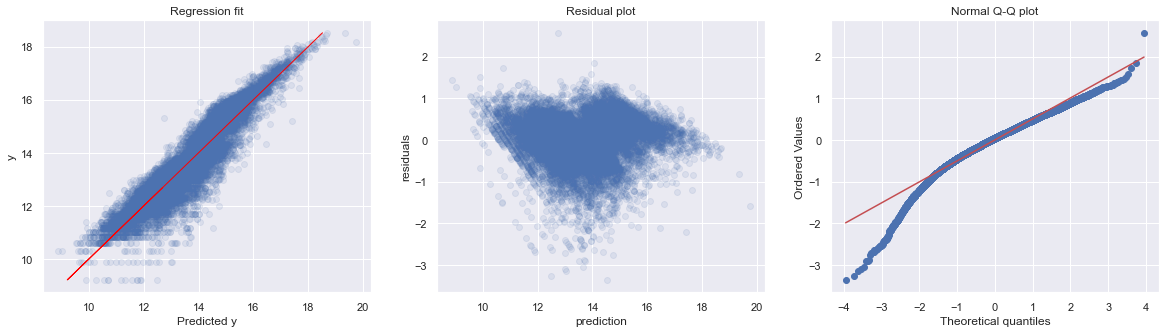

In [41]:
sns.set(style='darkgrid')
diagnostic_plot(X, y)

In [42]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2,random_state=42)


In [43]:
selected_columns = ['Age',  'Crossing', 'Finishing',
          'Heading_Accuracy', 'Short_Passing', 'Volleys', 'Dribbling', 'Curve', 'Freekick_Accuracy', 'Long_Passing',
          'Ball_Control','Acceleration', 'Sprint_Speed', 'Agility', 'Reactions', 'Balance','Shot_Power',
          'Jumping', 'Stamina', 'Strength', 'Long_Shots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
          'Penalties', 'Composure', 'Marking', 'Standing_Tackle', 'Sliding_Tackle']


In [44]:
# Testing with Lasso
lasso_model = Lasso(alpha = 0.1)    
lasso_model.fit(X_train_val[selected_columns], y_train_val)
list(zip(selected_columns, lasso_model.coef_))
## doing feature selection with Lasso

[('Age', -0.07003559051931345),
 ('Crossing', 0.0),
 ('Finishing', 7.65719747611325e-05),
 ('Heading_Accuracy', -0.0019939719980099774),
 ('Short_Passing', 0.011074133041583372),
 ('Volleys', -0.0),
 ('Dribbling', 0.0),
 ('Curve', 0.0016642055215963889),
 ('Freekick_Accuracy', 0.0),
 ('Long_Passing', 0.0007449818022205559),
 ('Ball_Control', 0.008066716413326605),
 ('Acceleration', 0.004831125768506935),
 ('Sprint_Speed', 0.0052673006415083),
 ('Agility', 0.0),
 ('Reactions', 0.1008105597781382),
 ('Balance', -0.010091061836290709),
 ('Shot_Power', 0.0035651867451909074),
 ('Jumping', 0.0037735294528873937),
 ('Stamina', -3.517389669594501e-05),
 ('Strength', 0.009919309939389095),
 ('Long_Shots', -0.0),
 ('Aggression', -0.0026912858213825157),
 ('Interceptions', -0.0031957897758957726),
 ('Positioning', -0.013669891707600537),
 ('Vision', 0.00682779264446436),
 ('Penalties', -0.0019292338950190292),
 ('Composure', 0.030125305825775505),
 ('Marking', -0.0),
 ('Standing_Tackle', -0.0),


In [45]:
std = StandardScaler()
std.fit(X_train_val.values)
X_tr = std.transform(X_train_val.values)
X_te = std.transform(X_test.values)
## Scaling x values for lasso,ridge,elastic net

In [46]:
kf = KFold(n_splits=5, shuffle=True, random_state = 71)


In [47]:
alphavec = 10**np.linspace(-15,4,400)
lasso_model = LassoCV(alphas = alphavec, cv=kf)
lasso_model.fit(X_tr, y_train_val)
lasso_model.alpha_
## finding alpha value that gives lowest MAE for Lasso CV

C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18.06150330791843, tolerance: 2.2690934296162424
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 35.355208831899745, tolerance: 2.2690934296162424
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.082193327412824, tolerance: 2.2690934296162424
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might wan

C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 64.95615973234271, tolerance: 2.268862411655261
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20.13324478692857, tolerance: 2.268862411655261
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27.749385452356364, tolerance: 2.268862411655261
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to

C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 33.784862875893396, tolerance: 2.288092315765955
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 62.26090051382471, tolerance: 2.288092315765955
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 33.726889113570905, tolerance: 2.288092315765955
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want t

5.179474679231202e-05

In [48]:
# testing with Ridged
alphavec = 10**np.linspace(-2,2,200)
ridge_model = RidgeCV(alphas = alphavec, cv=kf)
ridge_model.fit(X_tr, y_train_val)
ridge_model.alpha_
## finding alpha value that gives lowest MAE for Ridge CV

22.739657523579275

In [49]:
list(zip(X_train_val.columns, ridge_model.coef_))
# finding coefficients for optimum alpha value for Ridge

[('Potential', 0.786391584580685),
 ('Crossing', 0.03626494615040254),
 ('Finishing', 0.05193692928156241),
 ('Heading_Accuracy', -0.03387361846624857),
 ('Short_Passing', 0.07741381950208476),
 ('Volleys', 0.009317069665465779),
 ('Dribbling', -0.036968159356437665),
 ('Curve', 0.025056821828205057),
 ('Freekick_Accuracy', 0.013122503613023848),
 ('Long_Passing', 0.03149823613005301),
 ('Ball_Control', 0.09252749566367259),
 ('Acceleration', 0.056971731488585475),
 ('Sprint_Speed', 0.06785034958564097),
 ('Agility', 0.015475171126362899),
 ('Reactions', 0.4477419040510829),
 ('Balance', -0.10316084886187592),
 ('Shot_Power', 0.046829916006056155),
 ('Jumping', 0.030003784335060395),
 ('Stamina', 0.09749730110823457),
 ('Strength', 0.10448342902976993),
 ('Long_Shots', 0.0021721190542154985),
 ('Aggression', -0.03251202370343724),
 ('Interceptions', -0.02434903179190328),
 ('Positioning', -0.13086912070556977),
 ('Vision', 0.024320924563673758),
 ('Penalties', -0.08485177847181771),
 (

In [50]:
ridge_model_final = Ridge(alpha = 0.9329304026284686) 
Mean_R2_Ridge_CV = np.mean(cross_val_score(ridge_model_final, X_tr, y_train_val, cv=kf, scoring='r2'))
Mean_R2_Ridge_CV
# scoring the Ridge model based on CV

0.8668312740636039

In [51]:
Std_R2_Ridge_CV = np.std(cross_val_score(ridge_model_final, X_tr, y_train_val, cv=kf, scoring='r2'))
Std_R2_Ridge_CV

0.006611048153817276

In [52]:
Mean_MAE_Ridge_CV = -np.mean(cross_val_score(ridge_model_final, X_tr, y_train_val, cv=kf, scoring='neg_mean_absolute_error'))
Mean_MAE_Ridge_CV
# scoring the Ridge model based on CV

0.3918166411894193

In [53]:
Std_MAE_Ridge_CV = np.std(cross_val_score(ridge_model_final, X_tr, y_train_val, cv=kf, scoring='neg_mean_absolute_error'))
Std_MAE_Ridge_CV

0.005572395365463229

In [54]:
alphavec = 10**np.linspace(-22,-17,300)
elastic_model = ElasticNetCV(alphas = alphavec, cv=kf)
elastic_model.fit(X_tr, y_train_val)
elastic_model.alpha_
## finding alpha value that gives lowest MAE for ElasticNet CV

C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1481.4448289591076, tolerance: 2.2690934296162424
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1473.0019564820639, tolerance: 2.2690934296162424
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1469.26681311992, tolerance: 2.2690934296162424
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want

C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1480.5906578744598, tolerance: 2.2690934296162424
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1480.1395637148744, tolerance: 2.2690934296162424
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1480.2586215669935, tolerance: 2.2690934296162424
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might wa

C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1481.2201369958768, tolerance: 2.2690934296162424
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1481.296201983026, tolerance: 2.2690934296162424
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1481.21598777243, tolerance: 2.2690934296162424
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want 

C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1481.4283167170656, tolerance: 2.2690934296162424
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1481.4193813723602, tolerance: 2.2690934296162424
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1481.4369632915136, tolerance: 2.2690934296162424
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might wa

C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1481.4422207699831, tolerance: 2.2690934296162424
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1481.4434829067065, tolerance: 2.2690934296162424
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1481.4436473600292, tolerance: 2.2690934296162424
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might wa

C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1481.4446836994537, tolerance: 2.2690934296162424
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1481.4446511325066, tolerance: 2.2690934296162424
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1481.444707978267, tolerance: 2.2690934296162424
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might wan

C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1518.6415805755655, tolerance: 2.2651028068585854
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1516.4152641196563, tolerance: 2.2651028068585854
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1517.4510415762945, tolerance: 2.2651028068585854
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might wa

C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1521.4883830614353, tolerance: 2.2651028068585854
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1521.8799727165042, tolerance: 2.2651028068585854
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1522.1727233167965, tolerance: 2.2651028068585854
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might wa

C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1522.5393738186556, tolerance: 2.2651028068585854
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1522.5881056055853, tolerance: 2.2651028068585854
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1522.5807760434423, tolerance: 2.2651028068585854
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might wa

C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1522.6452886240054, tolerance: 2.2651028068585854
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1522.6498370990098, tolerance: 2.2651028068585854
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1522.6548218107982, tolerance: 2.2651028068585854
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might wa

C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1522.660842507473, tolerance: 2.2651028068585854
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1522.6607880123997, tolerance: 2.2651028068585854
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1522.6608198422757, tolerance: 2.2651028068585854
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might wan

C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1487.0992841199939, tolerance: 2.268862411655261
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1475.984083513341, tolerance: 2.268862411655261
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1477.5873902347519, tolerance: 2.268862411655261
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want t

C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1484.669536797467, tolerance: 2.268862411655261
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1485.7351252850096, tolerance: 2.268862411655261
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1485.974145418076, tolerance: 2.268862411655261
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to

C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1486.9762292482567, tolerance: 2.268862411655261
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1486.8624283075535, tolerance: 2.268862411655261
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1486.9473599037788, tolerance: 2.268862411655261
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want 

C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1487.0860366859365, tolerance: 2.268862411655261
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1487.0822735247955, tolerance: 2.268862411655261
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1487.0788136384435, tolerance: 2.268862411655261
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want 

C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1487.0954869687073, tolerance: 2.268862411655261
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1487.0978542631947, tolerance: 2.268862411655261
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1487.096484885522, tolerance: 2.268862411655261
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want t

C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1487.0989651570185, tolerance: 2.268862411655261
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1487.099157346797, tolerance: 2.268862411655261
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1487.0989926098305, tolerance: 2.268862411655261
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want t

C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1519.7011668744665, tolerance: 2.271886492267942
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1520.5591239624728, tolerance: 2.271886492267942
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1521.2381049747344, tolerance: 2.271886492267942
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want 

C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1524.960698654624, tolerance: 2.271886492267942
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1524.6332924937367, tolerance: 2.271886492267942
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1524.5748657113404, tolerance: 2.271886492267942
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want t

C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1525.538441823148, tolerance: 2.271886492267942
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1525.5056391157439, tolerance: 2.271886492267942
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1525.5648900193435, tolerance: 2.271886492267942
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want t

C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1525.6187637036146, tolerance: 2.271886492267942
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1525.627890160359, tolerance: 2.271886492267942
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1525.6198147025716, tolerance: 2.271886492267942
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want t

C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1525.6318154546552, tolerance: 2.271886492267942
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1525.6318580682853, tolerance: 2.271886492267942
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1525.6321739507998, tolerance: 2.271886492267942
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want 

C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1502.5743209205575, tolerance: 2.288092315765955
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1491.341455221747, tolerance: 2.288092315765955
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1488.169723549069, tolerance: 2.288092315765955
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to

C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1500.9536866857927, tolerance: 2.288092315765955
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1499.975529008123, tolerance: 2.288092315765955
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1499.359862057193, tolerance: 2.288092315765955
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to

C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1502.391557573517, tolerance: 2.288092315765955
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1502.3578680956311, tolerance: 2.288092315765955
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1502.4150652232413, tolerance: 2.288092315765955
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want t

C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1502.5278356701951, tolerance: 2.288092315765955
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1502.5430303793826, tolerance: 2.288092315765955
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1502.5555275574252, tolerance: 2.288092315765955
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want 

C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1502.5721999187153, tolerance: 2.288092315765955
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1502.5717977122226, tolerance: 2.288092315765955
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1502.5716880841583, tolerance: 2.288092315765955
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want 

C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1502.573978269305, tolerance: 2.288092315765955
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1502.574058366707, tolerance: 2.288092315765955
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1502.5742123817256, tolerance: 2.288092315765955
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to

1e-17

In [55]:
lm = LinearRegression()

Mean_R2_Linear_CV = np.mean(cross_val_score(lm, X_train_val, y_train_val, cv=kf, scoring='r2'))
Mean_R2_Linear_CV 
# scoring the LR model based on CV

0.8668309058754489

In [56]:
# finalizing values and getting predicted values
c = lm.fit(X_train_val, y_train_val)

In [57]:
y_pred=c.predict(X_test)
print(y_pred)

[14.05419365 11.31691637 11.98184967 ... 13.72721205 14.25475623
 13.23534589]


In [58]:
# getting predicted R-value score
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))

0.8693460129681149


In [59]:
# making final dataframe
test = pd.DataFrame(y_pred)

In [60]:
test.columns=['Log_Predicted_Value_Euro']
test

,Log_Predicted_Value_Euro
0,14.054194
1,11.316916
2,11.981850
3,14.289326
4,13.418879
5,12.409636
6,15.640525
7,13.677344
8,12.767270
9,13.158390


In [61]:
test1 = prep_df5.join(test, how ='inner')

In [62]:

test2 = test1.set_index('Player_Id')
test2

,Overall_Rating,Potential,Crossing,Finishing,Heading_Accuracy,Short_Passing,Volleys,Dribbling,Curve,Freekick_Accuracy,...,Positioning,Vision,Penalties,Composure,Marking,Standing_Tackle,Sliding_Tackle,Log_Value_Euro,Age,Log_Predicted_Value_Euro
Player_Id,,,,,,,,,,,,,,,,,,,,,
158023,94.0,94.0,86.0,95.0,70.0,92.0,86.0,97.0,93.0,94.0,...,94.0,94.0,75.0,96.0,33.0,28.0,26.0,18.520526,31,14.054194
190460,88.0,89.0,88.0,81.0,52.0,91.0,80.0,84.0,86.0,87.0,...,84.0,91.0,67.0,88.0,59.0,57.0,22.0,18.056837,27,11.316916
195864,88.0,91.0,80.0,75.0,75.0,86.0,85.0,87.0,85.0,82.0,...,82.0,88.0,82.0,87.0,63.0,67.0,67.0,18.105970,25,11.981850
198219,88.0,88.0,86.0,77.0,56.0,85.0,74.0,90.0,87.0,77.0,...,83.0,87.0,61.0,83.0,51.0,24.0,22.0,17.942645,27,14.289326
201024,88.0,91.0,30.0,22.0,83.0,68.0,14.0,69.0,28.0,28.0,...,24.0,49.0,33.0,80.0,91.0,88.0,87.0,17.909855,27,13.418879
203376,88.0,90.0,53.0,52.0,83.0,79.0,45.0,70.0,60.0,70.0,...,41.0,60.0,62.0,87.0,90.0,89.0,84.0,17.901487,27,12.409636
231747,88.0,95.0,77.0,88.0,77.0,82.0,78.0,90.0,77.0,63.0,...,88.0,82.0,70.0,86.0,34.0,34.0,32.0,18.209960,20,15.640525
153079,89.0,89.0,70.0,93.0,77.0,81.0,85.0,89.0,82.0,73.0,...,92.0,83.0,83.0,90.0,30.0,20.0,12.0,17.982176,30,13.677344
167495,89.0,89.0,15.0,13.0,25.0,55.0,11.0,30.0,14.0,11.0,...,12.0,70.0,47.0,70.0,17.0,10.0,11.0,17.453097,32,12.767270


In [63]:
test3 = test2.join(name_df, how = 'inner')
test3

,Overall_Rating,Potential,Crossing,Finishing,Heading_Accuracy,Short_Passing,Volleys,Dribbling,Curve,Freekick_Accuracy,...,Vision,Penalties,Composure,Marking,Standing_Tackle,Sliding_Tackle,Log_Value_Euro,Age,Log_Predicted_Value_Euro,Player_Name
Player_Id,,,,,,,,,,,,,,,,,,,,,
158023,94.0,94.0,86.0,95.0,70.0,92.0,86.0,97.0,93.0,94.0,...,94.0,75.0,96.0,33.0,28.0,26.0,18.520526,31,14.054194,L. Messi
190460,88.0,89.0,88.0,81.0,52.0,91.0,80.0,84.0,86.0,87.0,...,91.0,67.0,88.0,59.0,57.0,22.0,18.056837,27,11.316916,C. Eriksen
195864,88.0,91.0,80.0,75.0,75.0,86.0,85.0,87.0,85.0,82.0,...,88.0,82.0,87.0,63.0,67.0,67.0,18.105970,25,11.981850,P. Pogba
198219,88.0,88.0,86.0,77.0,56.0,85.0,74.0,90.0,87.0,77.0,...,87.0,61.0,83.0,51.0,24.0,22.0,17.942645,27,14.289326,L. Insigne
201024,88.0,91.0,30.0,22.0,83.0,68.0,14.0,69.0,28.0,28.0,...,49.0,33.0,80.0,91.0,88.0,87.0,17.909855,27,13.418879,K. Koulibaly
203376,88.0,90.0,53.0,52.0,83.0,79.0,45.0,70.0,60.0,70.0,...,60.0,62.0,87.0,90.0,89.0,84.0,17.901487,27,12.409636,V. van Dijk
231747,88.0,95.0,77.0,88.0,77.0,82.0,78.0,90.0,77.0,63.0,...,82.0,70.0,86.0,34.0,34.0,32.0,18.209960,20,15.640525,K. Mbappé
153079,89.0,89.0,70.0,93.0,77.0,81.0,85.0,89.0,82.0,73.0,...,83.0,83.0,90.0,30.0,20.0,12.0,17.982176,30,13.677344,S. Agüero
167495,89.0,89.0,15.0,13.0,25.0,55.0,11.0,30.0,14.0,11.0,...,70.0,47.0,70.0,17.0,10.0,11.0,17.453097,32,12.767270,M. Neuer


In [64]:
# getting rational numbers out of log transfermation
final_df = test3.copy()
final_df['Value_Euro'] = np.exp(final_df['Log_Value_Euro'])
final_df['Predicted_Value_Euro'] = np.exp(final_df['Log_Predicted_Value_Euro'])


In [65]:
final_df['Value_Euro']= final_df['Value_Euro'].apply(lambda x : "{:,}".format(int(x)))
final_df['Predicted_Value_Euro']= final_df['Predicted_Value_Euro'].apply(lambda x : "{:,}".format(int(x)))


In [66]:
final_df

,Overall_Rating,Potential,Crossing,Finishing,Heading_Accuracy,Short_Passing,Volleys,Dribbling,Curve,Freekick_Accuracy,...,Composure,Marking,Standing_Tackle,Sliding_Tackle,Log_Value_Euro,Age,Log_Predicted_Value_Euro,Player_Name,Value_Euro,Predicted_Value_Euro
Player_Id,,,,,,,,,,,,,,,,,,,,,
158023,94.0,94.0,86.0,95.0,70.0,92.0,86.0,97.0,93.0,94.0,...,96.0,33.0,28.0,26.0,18.520526,31,14.054194,L. Messi,"110,500,000","1,269,576"
190460,88.0,89.0,88.0,81.0,52.0,91.0,80.0,84.0,86.0,87.0,...,88.0,59.0,57.0,22.0,18.056837,27,11.316916,C. Eriksen,"69,499,999","82,200"
195864,88.0,91.0,80.0,75.0,75.0,86.0,85.0,87.0,85.0,82.0,...,87.0,63.0,67.0,67.0,18.105970,25,11.981850,P. Pogba,"73,000,000","159,827"
198219,88.0,88.0,86.0,77.0,56.0,85.0,74.0,90.0,87.0,77.0,...,83.0,51.0,24.0,22.0,17.942645,27,14.289326,L. Insigne,"62,000,000","1,606,110"
201024,88.0,91.0,30.0,22.0,83.0,68.0,14.0,69.0,28.0,28.0,...,80.0,91.0,88.0,87.0,17.909855,27,13.418879,K. Koulibaly,"60,000,000","672,581"
203376,88.0,90.0,53.0,52.0,83.0,79.0,45.0,70.0,60.0,70.0,...,87.0,90.0,89.0,84.0,17.901487,27,12.409636,V. van Dijk,"59,499,999","245,152"
231747,88.0,95.0,77.0,88.0,77.0,82.0,78.0,90.0,77.0,63.0,...,86.0,34.0,34.0,32.0,18.209960,20,15.640525,K. Mbappé,"81,000,000","6,202,887"
153079,89.0,89.0,70.0,93.0,77.0,81.0,85.0,89.0,82.0,73.0,...,90.0,30.0,20.0,12.0,17.982176,30,13.677344,S. Agüero,"64,499,999","870,953"
167495,89.0,89.0,15.0,13.0,25.0,55.0,11.0,30.0,14.0,11.0,...,70.0,17.0,10.0,11.0,17.453097,32,12.767270,M. Neuer,"37,999,999","350,553"


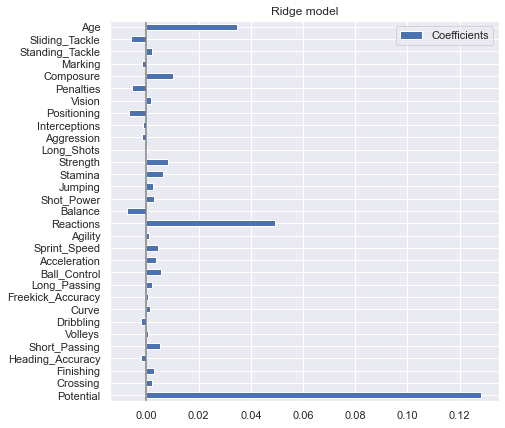

In [67]:
# checking feature values
coefs = pd.DataFrame(
   lm.coef_,
   columns=['Coefficients'], index=X_train_val.columns
)

coefs.plot(kind='barh', figsize=(9, 7))
plt.title('Ridge model')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

Feature: 0, Score: 0.12912
Feature: 1, Score: 0.00244
Feature: 2, Score: 0.00296
Feature: 3, Score: -0.00176
Feature: 4, Score: 0.00421
Feature: 5, Score: 0.00048
Feature: 6, Score: -0.00189
Feature: 7, Score: 0.00128
Feature: 8, Score: 0.00087
Feature: 9, Score: 0.00266
Feature: 10, Score: 0.00522
Feature: 11, Score: 0.00315
Feature: 12, Score: 0.00466
Feature: 13, Score: 0.00095
Feature: 14, Score: 0.04875
Feature: 15, Score: -0.00699
Feature: 16, Score: 0.00278
Feature: 17, Score: 0.00244
Feature: 18, Score: 0.00667
Feature: 19, Score: 0.00819
Feature: 20, Score: -0.00013
Feature: 21, Score: -0.00207
Feature: 22, Score: -0.00096
Feature: 23, Score: -0.00669
Feature: 24, Score: 0.00156
Feature: 25, Score: -0.00541
Feature: 26, Score: 0.01025
Feature: 27, Score: -0.00172
Feature: 28, Score: 0.00168
Feature: 29, Score: -0.00580
Feature: 30, Score: 0.03662


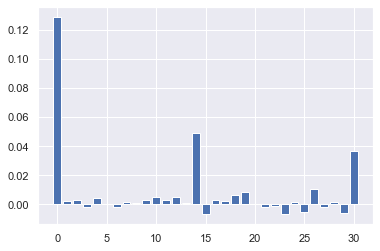

In [68]:
# linear regression feature importance
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
# fit the model
lm.fit(X, y)
# get importance
importance = lm.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [70]:
# exporting and pickling 
final_df.to_csv('Machine_Learning_Output.csv')

In [ ]:
import pickle

In [ ]:
with open ('FIFA_PICKLE','wb') as f:
    pickle.dump(lm,f)

In [ ]:
with open('FIFA_PICKLE','rb') as f:
    lm = pickle.load(f)

In [ ]:
final_df.dtypes
